# CIFAR-10 Image Classification with PyTorch Visualisation

## Imports

In [1]:
import torch
import torch.nn.functional as F
from torchvision import datasets,transforms
from torch import nn
import matplotlib.pyplot as plt
import numpy as np

## Downloading the data

In [2]:
transform_train = transforms.Compose([transforms.Resize((32,32)),  #resizes the image so it can be perfect for our model.
                                      transforms.RandomRotation(20),     #Rotates the image to a specified angel
                                      transforms.RandomAffine(0, shear=10, scale=(0.8,1.2)), #Performs actions like zooms, change shear angles.
                                      transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2), # Set the color params
                                      transforms.ToTensor(), # comvert the image to tensor so that it can work with torch
                                      transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)) #Normalize all the images
                               ])
 
 
transform = transforms.Compose([transforms.Resize((32,32)),
                               transforms.ToTensor(),
                               transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
                               ])
training_dataset = datasets.CIFAR10(root='./data', train=True, download=True, transform=transform) # Data augmentation is only done on training images
validation_dataset = datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)
 
training_loader = torch.utils.data.DataLoader(training_dataset, batch_size=100, shuffle=True) # Batch size of 100 i.e to work with 100 images at a time
validation_loader = torch.utils.data.DataLoader(validation_dataset, batch_size = 100, shuffle=False)

print(f'Training data shape: {training_dataset.data.shape}')
print(f'Training labels shape: {len(training_dataset.targets)}')
print(f'Test data shape: {validation_dataset.data.shape}')
print(f'Test labels shape: {len(validation_dataset.targets)}')

100%|██████████| 170498071/170498071 [01:16<00:00, 2233790.43it/s]


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified
Training data shape: (50000, 32, 32, 3)
Training labels shape: 50000
Test data shape: (10000, 32, 32, 3)
Test labels shape: 10000


## Plotting Images

<Figure size 2500x400 with 0 Axes>

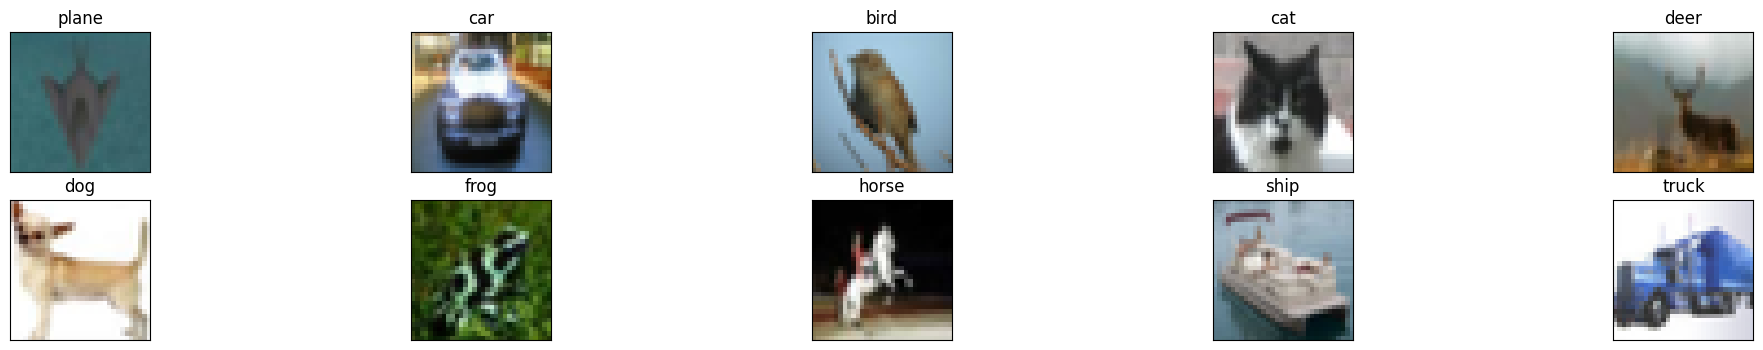

In [3]:
# We need to convert the images to numpy arrays as tensors are not compatible with matplotlib.
def im_convert(tensor):  
  image = tensor.cpu().clone().detach().numpy() # This process will happen in normal cpu.
  image = image.transpose(1, 2, 0)
  image = image * np.array((0.5, 0.5, 0.5)) + np.array((0.5, 0.5, 0.5))
  image = image.clip(0, 1)
  return image

# Different classes in CIPHAR 10 dataset. 
classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

# We iter the batch of images to display
dataiter = iter(training_loader) # converting our train_dataloader to iterable so that we can iter through it. 
images, labels = next(dataiter) #going from 1st batch of 100 images to the next batch
fig = plt.figure(figsize=(25, 4)) 

"""
# We plot 20 images from our train_dataset
for idx in np.arange(20):
  ax = fig.add_subplot(2, 10, idx+1, xticks=[], yticks=[]) 
  plt.imshow(im_convert(images[idx])) #converting to numpy array as plt needs it.
  ax.set_title(classes[labels[idx].item()])
"""

# Display one image for each class
fig = plt.figure(figsize=(25, 4))
for i in range(len(classes)):
  ax = fig.add_subplot(2, 5, i+1, xticks=[], yticks=[])
  idx = np.where(labels == i)[0][0]
  plt.imshow(im_convert(images[idx]))
  ax.set_title(classes[i])
plt.show()

## Example model (CNN)